## K-NearestNeighbor
###  KNN原理

对于一个需要分类的物品A，找出与该物品最相似的k个有已知类别的物品，这k个物品中出现最多的类别即为物品A的类别。如下图：
<img src="imgs/knn1.png" width="350" >
总结出来就一句俗语<span style="color:red;">：“近朱者赤，近墨者黑”</span>。

### K 值的选取
我们可以从上面的例子看出，KNN算法的结果很大程度取决于K的选择。

>如果选择较小的K值，就相当于用较小的邻域中的训练实例进行预测，预测结果会对近邻实例点非常敏感。如果邻近的实例点恰巧是噪声，预测就会出错。<br> <br> 
如果选择较大的k值，就相当于用较大邻域中的训练实例进行预测，这时与输入实例较远的训练实例也会起预测作用，可能会使预测发生错误。 

    
在应用中，通常采用**交叉验证法**来来选取最优的 K 值。

### 相似度的度量
相似性一般用空间内两个点的距离来度量。距离越大，表示两个物品越不相似。常见的距离计算方法有：曼哈顿距离、欧式距离、切比雪夫距离、杰卡德系数、夹角余弦等。



##### 曼哈顿距离（Manhattan Distance）
想象你在城市里要从一个十字路口开车到另外一个十字路口，驾驶距离是两点间的直线距离吗？显然不是，除非你能穿越大楼。实际驾驶距离就是这个“曼哈顿距离”。曼哈顿距离也叫$L_1$范数，它表示两个点在标准坐标系上的绝对轴距总和。

二维平面两点 $ a(x_1,y_1)与b(x_2,y_2) $ 的曼哈顿距离：
$$ d_{ab}=\left | x_1-x_2 \right |+\left | y_1-y_2 \right | $$
两个n维向量$ a(x_{11},x_{12},…,x_{1n})与 b(x_{21},x_{22},…,x_{2n})$间的曼哈顿距离:
$$ d_{ab}=\sum \limits_{k=1}\limits^n \left | x_{1k}-x_{2k} \right | $$

##### 欧式距离（Euclidean Distance）
欧式距离也叫$L_2$范数，就是两点间的直线距离。

二维平面两点 $ a(x_1,y_1)与b(x_2,y_2) $ 的欧式距离：
$$d_{ab}=\sqrt{(x_1-x_2 )^2+(y_1-y_2)^2}$$
两个n维向量$ a(x_{11},x_{12},…,x_{1n})与 b(x_{21},x_{22},…,x_{2n})$间的欧式距离:
$$d_{ab}=\sqrt{\sum \limits_{k=1}\limits^n  (x_{1k}-x_{2k})^2} $$
<img src="imgs/d.jpg" width="200">

##### 切比雪夫距离（Chebyshev Distance）
国际象棋中，国王可以直行、横行、斜行。国王走一步，可以移动到相邻的8个方格的任意一个。国王从格子A到格子B最少需要多少步？这个距离就是切比雪夫距离，也叫棋盘距离或者$L_\infty$范数，，它表示二点之间的各坐标数值差的绝对值的最大值。

二维平面两点 $ a(x_1,y_1)与b(x_2,y_2) $ 的切比雪夫距离：
$$ d_{ab}=max(\left | x_1-x_2 \right |,\left | y_1-y_2 \right |)$$
两个n维向量$ a(x_{11},x_{12},…,x_{1n})与 b(x_{21},x_{22},…,x_{2n})$间的切比雪夫距离:
$$ d_{ab}=max(\left | x_{11}-x_{21} \right |,\left | x_{12}-x_{22} \right |,\cdots,\left | x_{1n}-x_{2n} \right |) \Leftrightarrow \lim_{k\to\infty }\left(\sum \limits_{i=1}\limits^n\left | x_{1i}-x_{2i} \right |^k\right)^{\frac{1}{k}}$$
<img src="imgs/qbxf.png" width="200">AB之间的切比雪夫距离是多少？

##### 闵可夫斯基距离（Minkowski Distance）
闵氏距离不是一种距离，而是一组距离的定义，是对多个距离度量公式的概括性的表述。
两个n维向量$ a(x_{11},x_{12},…,x_{1n})与 b(x_{21},x_{22},…,x_{2n})$间的闵氏距离定义为：
$$ L_p=\left(\sum \limits_{i=1}\limits^n\left | x_{1i}-x_{2i} \right |^p\right)^{\frac{1}{p}}$$
上式也叫**Lp范数**，p是一个变量：p=1时，曼哈顿距离；p=2时，欧式距离；p=3时，切比雪夫距离。

##### 杰卡德系数（(Jaccard similarity coefficient）
两个集合A和B的交集元素在A，B的并集中所占的比例，称为两个集合的杰卡德相似系数，用符号J(A,B)表示，用来衡量两个集合的相似度。
$$J(A,B)=\frac{\left |A\cap B  \right |}{\left |A\cup B  \right |}$$
**杰卡德距离（Jaccard distance）**是杰卡德相似系数的补集，被定义为1减去Jaccard相似系数，用来度量两个集合之间的差异性。
 $$d_J(A,B)=1-J(A,B)=\frac{\left |A\cup B-A\cap B  \right |}{\left |A\cup B  \right |}$$

##### 夹角余弦
夹角余弦可用来衡量两个向量方向的差异，机器学习中借用这一概念来衡量样本向量之间的差异。

二维空间中向量$ a(x_1,y_1)与b(x_2,y_2) $的夹角余弦公式：
$$\cos(\theta )=\frac{ x_1x_2+y_1y_2}{\sqrt{x_1\,^2+y_1\,^2}\sqrt{x_2\,^2+y_2\,^2}}$$
两个n维样本点$ a(x_{11},x_{12},…,x_{1n})与 b(x_{21},x_{22},…,x_{2n})$的夹角余弦：
$$\cos(\theta )=\frac{ a\cdot b}{\left |  a\right |\left |  b\right |}
=\frac{ \sum \limits_{k=1}\limits^nx_{1k}x_{2k}}{\sqrt{\sum \limits_{k=1}\limits^nx_{1k}\, ^2}\sqrt{\sum \limits_{k=1}\limits^nx_{2k}\, ^2}}$$
夹角余弦取值范围为 [-1,1] 。夹角余弦越大表示两个向量的夹角越小，夹角余弦越小表示两向量的夹角越大。当两个向量的方向重合时夹角余弦取最大值1，当两个向量的方向完全相反夹角余弦取最小值-1。

## KNN程序示例
接下来，我们来实现KNN


In [1]:
import numpy as np
    
#构建一组训练数据，共4个样本以及对应的标签   
def createDataSet():
    group = np.array([[1.0, 1.1], 
                      [1.0, 1.0], 
                      [0.1, 0.2], 
                      [0.1, 0.1]])
    labels = ['A', 'A ', 'B', 'B']
    return group, labels

#实现分类
def classify0(inputData, dataSet, labels, k):
    '''
    inputData:待分类的点
    dataSet：训练集
    labels：标签数据
    k: 最近的K个样本
    '''
    # 获取矩阵的行列大小 [0]表示获取行
    dataSetSize = dataSet.shape[0]
    
    # tile 是复制 输入的数据构造一个矩阵,与样本对应元素作差
    diffMat =  np.tile(inputData, (dataSetSize, 1)) - dataSet 
    
     #将差值平方
    sqDiffMat = diffMat ** 2
    print(sqDiffMat)
    
    #按行累加 相当于x^2+y^2
    sqDistances =  np.sum(sqDiffMat, axis=  1) 
    
    #将差值平方和求开方，即得欧氏距离
    distances = sqDistances ** 0.5  
    
    #返回从小到大排序后的原数组索引值
    sortedDistIndicies = distances.argsort() 
    print(distances)
    print(f"返回从小到大排序后的原数组索引值:{sortedDistIndicies}")
    
    classCount = {}  #定义一个空字典
    for i in range(k):
        # 获取k个点所对应的分类 'A', 'B'
        voteLabel = labels[sortedDistIndicies[i]]
        # 对选取的K个样本所属的类别个数进行统计
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
        
    print(classCount)
    
    # 选取出现的类别次数最多的类别
    maxCount = 0
    maxClass= ""
    for key, value in classCount.items():
        if value > maxCount:
            maxCount = value
            maxClass = key
            
    return maxClass

[[6.084e-01 9.409e-01]
 [6.084e-01 7.569e-01]
 [1.440e-02 4.900e-03]
 [1.440e-02 9.000e-04]]
[1.2447088  1.16846053 0.13892444 0.12369317]
返回从小到大排序后的原数组索引值:[3 2 1 0]
{'B': 2, 'A ': 1}


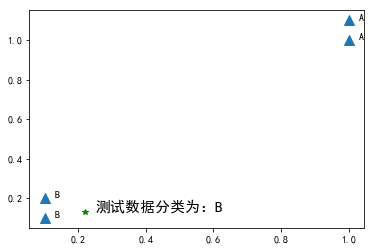

In [4]:
##测试分类器
from matplotlib import pyplot as plt

# 设置中文字体,用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置中文字体后会使用unicode的减号，用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False


t = [0.22, 0.13]
ds, labels = createDataSet()
c = classify0(t,ds, labels,3)

#可视化展示
plt.plot(t[0],t[1],"g*",linewidth = 3.0)
plt.annotate(f"测试数据分类为：{c}", xy = (t[0], t[1]), xytext = (t[0]+0.03, t[1]),size=15)
x = ds[:, 0]  # group第一列数据
y = ds[:, 1]  # group第二列数据
plt.scatter(x, y, s=100,marker="^")

for i in range(len(ds)):
    # 这里xy是需要标记的坐标，xytext是对应的标签坐标
    plt.annotate(labels[i], xy = (x[i], y[i]), xytext = (x[i]+0.03, y[i]))
    
plt.show()


